In [47]:
setwd("/Users/rebecca/sudmant/analyses/myotis/analysis/reciprocal_best_hits/contextualize_best_hits")

library(data.table)
library(ComplexHeatmap)

myo_meta <- read.csv("../../../data/myotis_meta.csv")

jaccard_index <- function(x, y) {
  intrsct <- length(intersect(x, y))
  union <- length(x) + length(y) - intrsct
  return(intrsct/union)
}

In [ ]:
for (i in seq_along(1:nrow(myo_meta))) {

  species_files <- list.files(path = "resources", pattern = paste0("^", myo_meta$Abbr[i], "orthologous"))

  gene_name_list <- lapply(seq_along(species_files), function(j) {
    species_genes <- fread(file.path("resources", species_files[j]), data.table = FALSE)
    return(species_genes$human_gene_name)
  })

}

In [30]:
species_files <- list.files(path = "resources", pattern = paste0("^", myo_meta$Abbr[i], ".*orthologous"))

gene_name_list <- lapply(seq_along(species_files), function(j) {
  species_genes <- fread(file.path("resources", species_files[j]), data.table = FALSE)
  return(unique)
})
other_species <- sapply(strsplit(gsub(myo_meta$Abbr[i], "", species_files), "_"), "[", 4)
names(gene_name_list) <- other_species

In [53]:
jaccard_mat <- do.call(
  cbind,
  lapply(gene_name_list, function(x) unlist(lapply(gene_name_list, function(y) jaccard_index(x, y))))
)
diag(jaccard_mat) <- NA

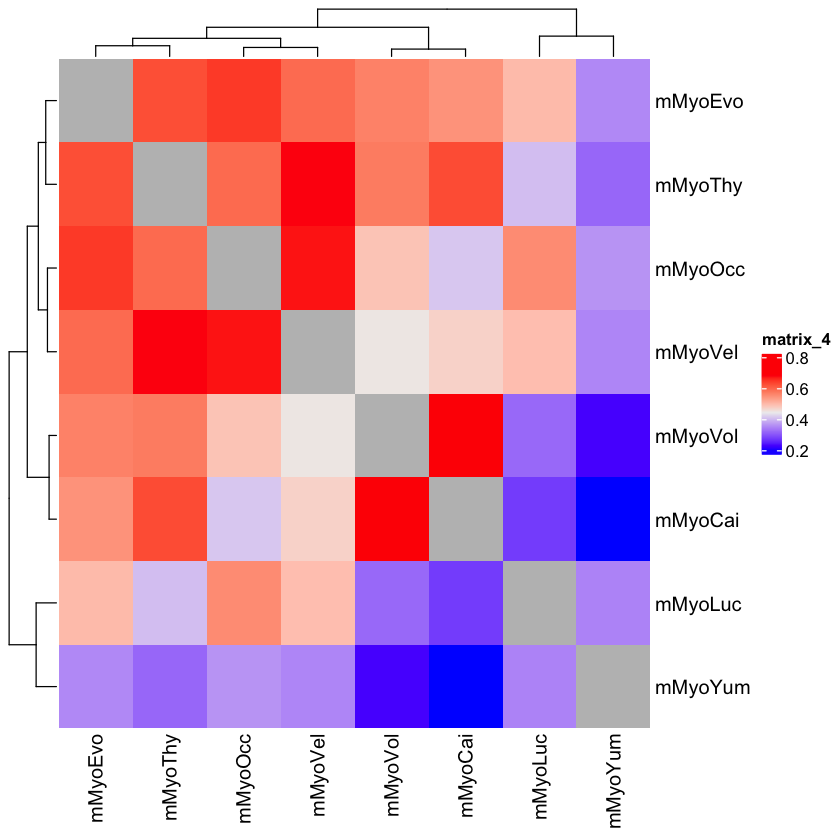

In [54]:
Heatmap(jaccard_mat)